In [1]:
#get image size info and bbox index info
import glob
import numpy as np
import os
import pandas as pd

In [2]:
def get_npy_shapes_recursive_with_glob(root_dir):
    npy_shapes = []
    pattern = os.path.join(root_dir, '**', '*.npy')  # Recursive glob pattern
    for file_path in glob.glob(pattern, recursive=True):
        try:
            data = np.load(file_path, mmap_mode='r')
            if isinstance(data, np.ndarray) and data.ndim == 2:
                npy_shapes.append((file_path, data.shape))
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    return npy_shapes

In [25]:
root_directory = "/data1/lidc-idri/slices"
shapes = get_npy_shapes_recursive_with_glob(root_directory)
shapediclist =[]
for path, shape in shapes:
    pid = path.split('/')[-2]
    slice = "_".join(os.path.splitext(os.path.basename(path))[0].split("_")[:-1])
    print(f"{pid} {slice}: shape = {shape}")
    shapediclist.append({"pid":pid,"slice":slice,"shape":shape})

shapedf = pd.DataFrame(shapediclist)

LIDC-IDRI-0434 slice_050: shape = (360, 360)
LIDC-IDRI-0434 slice_047: shape = (360, 360)
LIDC-IDRI-0434 slice_048: shape = (360, 360)
LIDC-IDRI-0434 slice_051: shape = (360, 360)
LIDC-IDRI-0434 slice_054: shape = (360, 360)
LIDC-IDRI-0434 slice_049: shape = (360, 360)
LIDC-IDRI-0434 slice_053: shape = (360, 360)
LIDC-IDRI-0354 slice_073: shape = (326, 326)
LIDC-IDRI-0354 slice_059: shape = (326, 326)
LIDC-IDRI-0354 slice_060: shape = (326, 326)
LIDC-IDRI-0354 slice_074: shape = (326, 326)
LIDC-IDRI-0354 slice_072: shape = (326, 326)
LIDC-IDRI-0354 slice_061: shape = (326, 326)
LIDC-IDRI-0355_1 slice_058: shape = (314, 314)
LIDC-IDRI-0355_1 slice_053: shape = (314, 314)
LIDC-IDRI-0355_1 slice_062: shape = (314, 314)
LIDC-IDRI-0355_1 slice_060: shape = (314, 314)
LIDC-IDRI-0355_1 slice_056: shape = (314, 314)
LIDC-IDRI-0355_1 slice_061: shape = (314, 314)
LIDC-IDRI-0355_1 slice_055: shape = (314, 314)
LIDC-IDRI-0355_1 slice_054: shape = (314, 314)
LIDC-IDRI-0355_1 slice_057: shape = (31

In [8]:
sizes = np.array([shape[1] for shape in shapes])

In [16]:
pd.DataFrame(sizes,columns=['xsize','ysize']).describe()

,xsize,ysize
count,7849.000000,7849.000000
mean,356.106510,356.106510
std,43.645574,43.645574
min,236.000000,236.000000
25%,329.000000,329.000000
50%,360.000000,360.000000
75%,380.000000,380.000000
max,500.000000,500.000000


In [ ]:
import matplotlib.pyplot as plt
plt.hist(sizes[:,0])

In [28]:
bbdf = pd.read_json("/data2/lijin/lidc-prep/kjs/bbox/bbdata.json")

In [26]:
shapedf.describe()

,pid,slice,shape
count,7849,7849,7849
unique,889,162,150
top,LIDC-IDRI-0583,slice_069,"(360, 360)"
freq,38,142,1265


In [6]:
aa = np.load('/data1/lidc-idri/slices/LIDC-IDRI-0003/slice_066_4.npy')

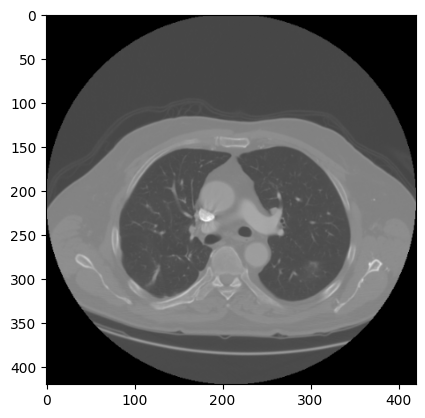

In [9]:
import matplotlib.pyplot as plt
plt.imshow(aa,cmap="grey")

In [15]:
aa.shape

(420, 420)

In [18]:
pd.Series(aa[100:320,100:320].flatten()).describe()

count    48400.000000
mean      -474.205021
std        470.716435
min      -1010.000000
25%       -874.000000
50%       -784.000000
75%        -55.000000
max       1738.000000
dtype: float64

In [4]:
split_0 = np.load('/data1/lidc-idri/slices/LIDC-IDRI-0624/slice_050_5.npy') #train_malB's first entry
split_0

array([[ -988,  -987, -1000, ...,  -990,  -999,  -988],
       [ -996,  -988,  -986, ...,  -991,  -985,  -989],
       [-1000,  -994,  -989, ...,  -973,  -998,  -987],
       ...,
       [ -672,  -871,  -902, ...,  -988,  -999,  -998],
       [ -285,  -662,  -894, ...,  -980,  -981,  -999],
       [  143,  -245,  -648, ...,  -993,  -998,  -997]], dtype=int16)

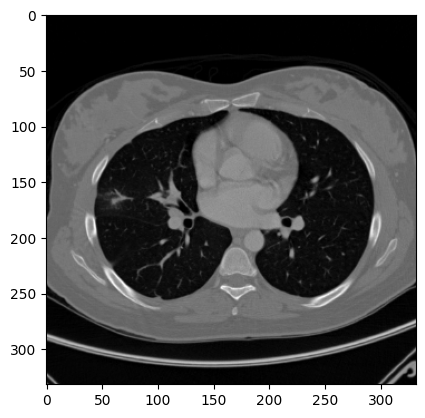

In [10]:
plt.imshow(split_0,cmap="grey")

In [64]:
#check bbox maximum location in pixels for all images
pdbb = pd.read_json("/data2/lijin/lidc-prep/kjs/bbox/allbb.json")
pdbb['slice'] = pdbb['slice'].astype(str).apply(lambda s: "_".join(s.split("_")[:-1]+[s.split("_")[-1].zfill(3)]))


In [65]:
#pdbb['slice'] =
#zfill(3)
pdbb.describe()

,pid,slice,poly,bb
count,7985,7985,7985,7985
unique,889,162,7782,7667
top,LIDC-IDRI-0777_1,slice_069,"[[[274, 221], [274, 222], [274, 222], [274, 22...","[[[274, 278], [221, 225]]]"
freq,95,146,6,12


In [ ]:
pdbb[pdbb.duplicated(subset=['pid','slice'])]

In [66]:
shapebb = pd.merge(shapedf, pdbb.groupby(['pid','slice'],as_index=False).first(), on=['pid','slice'], how='inner')

In [68]:
shapebb.describe()

,pid,slice,shape,poly,bb
count,7801,7801,7801,7801,7801
unique,889,162,150,7734,7619
top,LIDC-IDRI-0583,slice_068,"(360, 360)","[[[184, 141], [183, 141], [182, 142], [181, 14...","[[[274, 278], [221, 225]]]"
freq,38,142,1265,2,4


In [94]:
shapebbex = shapebb.explode(column=['bb'])

In [95]:
shapebbex

,pid,slice,shape,poly,bb
0,LIDC-IDRI-0434,slice_050,"(360, 360)","[[[104, 122], [105, 122], [105, 122], [106, 12...","[[101, 108], [115, 122]]"
1,LIDC-IDRI-0434,slice_047,"(360, 360)","[[[108, 100], [109, 100], [110, 101], [110, 10...","[[108, 114], [100, 103]]"
2,LIDC-IDRI-0434,slice_048,"(360, 360)","[[[110, 105], [111, 104], [112, 104], [112, 10...","[[107, 114], [98, 105]]"
3,LIDC-IDRI-0434,slice_051,"(360, 360)","[[[105, 123], [106, 122], [107, 122], [108, 12...","[[101, 108], [117, 123]]"
4,LIDC-IDRI-0434,slice_054,"(360, 360)","[[[112, 141], [112, 141], [113, 140], [113, 13...","[[110, 113], [137, 141]]"
...,...,...,...,...,...
7796,LIDC-IDRI-0061,slice_054,"(420, 420)","[[[187, 250], [188, 250], [189, 250], [189, 24...","[[185, 202], [249, 266]]"
7797,LIDC-IDRI-0061,slice_034,"(420, 420)","[[[312, 267], [311, 267], [310, 268], [309, 26...","[[308, 322], [267, 281]]"
7798,LIDC-IDRI-0061,slice_053,"(420, 420)","[[[186, 255], [186, 254], [186, 253], [186, 25...","[[185, 206], [249, 267]]"
7799,LIDC-IDRI-0061,slice_077,"(420, 420)","[[[281, 313], [282, 312], [283, 312], [284, 31...","[[263, 301], [280, 313]]"


In [99]:
shapebbex['xdiff'] = shapebbex.apply(lambda r: np.array(r['bb'][0])-r['shape'][0]/2,axis=1)
shapebbex['ydiff'] = shapebbex.apply(lambda r: np.array(r['bb'][1])-r['shape'][1]/2,axis=1)
# shapebb.explode(column=['bb']).apply(lambda r: r['bb'][0][0],axis=1)

In [110]:
shapebbex[['xdiff']].explode(column=['xdiff']).astype(float).abs().describe()

,xdiff
count,18544.000000
mean,74.929142
std,30.253860
min,0.000000
25%,52.000000
50%,75.000000
75%,98.000000
max,181.000000


In [111]:
shapebbex[['ydiff']].explode(column=['ydiff']).astype(float).abs().describe()

,ydiff
count,18544.000000
mean,46.134437
std,28.067792
min,0.000000
25%,23.000000
50%,44.500000
75%,67.000000
max,135.500000


In [73]:
pdbb.groupby(['pid','slice'],as_index=False).first()[['pid','slice']]

,pid,slice
0,LIDC-IDRI-0001,slice_072
1,LIDC-IDRI-0001,slice_073
2,LIDC-IDRI-0001,slice_074
3,LIDC-IDRI-0001,slice_075
4,LIDC-IDRI-0001,slice_076
...,...,...
7844,LIDC-IDRI-1012,slice_041
7845,LIDC-IDRI-1012,slice_042
7846,LIDC-IDRI-1012_1,slice_040
7847,LIDC-IDRI-1012_1,slice_041


In [71]:
shapedf[['pid','slice']].sort_values(by=['pid','slice']).describe()

,pid,slice
count,7849,7849
unique,889,162
top,LIDC-IDRI-0583,slice_069
freq,38,142
